In [ ]:
!pip install soundfile
import IPython

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import librosa as lib
import soundfile
import os, glob, pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import librosa.display as libp
import IPython as ipy


In [ ]:
data='/content/drive/MyDrive/Colab Notebooks/SOUNDATASET/Soundataset/ALL'
list1=os.listdir(data)
path=[]
print(list1)

path=[]
dir=os.path.dirname(data)
print(dir)
for p in list1:
  d=dir + '/ALL/' + p
  path.append(d)
print(path)


['DC_a01.wav', 'DC_a13.wav', 'DC_a14.wav', 'DC_a08.wav', 'DC_a12.wav', 'DC_a05.wav', 'DC_a03.wav', 'DC_a10.wav', 'DC_a11.wav', 'DC_a09.wav', 'DC_a04.wav', 'DC_a02.wav', 'DC_a07.wav', 'DC_a06.wav', 'DC_f02.wav', 'DC_h07.wav', 'DC_f03.wav', 'DC_d05.wav', 'DC_f10.wav', 'DC_f13.wav', 'DC_h04.wav', 'DC_d13.wav', 'DC_f04.wav', 'DC_d03.wav', 'DC_f08.wav', 'DC_d04.wav', 'DC_h10.wav', 'DC_h15.wav', 'DC_d12.wav', 'DC_n01.wav', 'DC_h01.wav', 'DC_f06.wav', 'DC_h12.wav', 'DC_d10.wav', 'DC_h14.wav', 'DC_h02.wav', 'DC_d14.wav', 'DC_n02.wav', 'DC_d06.wav', 'DC_h05.wav', 'DC_d02.wav', 'DC_d11.wav', 'DC_d15.wav', 'DC_f14.wav', 'DC_h08.wav', 'DC_f07.wav', 'DC_d07.wav', 'DC_n03.wav', 'DC_h11.wav', 'DC_f15.wav', 'DC_d08.wav', 'DC_h03.wav', 'DC_h09.wav', 'DC_h13.wav', 'DC_f12.wav', 'DC_a15.wav', 'DC_f09.wav', 'DC_f01.wav', 'DC_d09.wav', 'DC_d01.wav', 'DC_h06.wav', 'DC_f11.wav', 'DC_f05.wav', 'DC_n29.wav', 'DC_su07.wav', 'DC_su02.wav', 'DC_sa12.wav', 'DC_n24.wav', 'DC_sa03.wav', 'DC_n04.wav', 'DC_su03.wav', 

In [ ]:
emotion=[]

for i in list1:
 if i[-8:-6]=='_a':
  emotion.append('male_angry')
 elif i[-8:-6]=='_h':
    emotion.append('male_happy')
 elif i[-8:-6]=='_d':
    emotion.append('male_disgust')
 elif i[-8:-6]=='_n':
    emotion.append('male_neutral')
 elif i[-8:-6]=='_f':
   emotion.append('male_fear')
 elif i[-8:-6]=='su':
    emotion.append('male_surprise')
 elif i[-8:-6]=='sa':
    emotion.append('male_sa')
 else:
    emotion.append('unusual')
   

df=pd.DataFrame(emotion, columns=['labels'])
df['audio']=list1
df['Path']=path
print(df)
print(df['labels'].value_counts())

df['labels']=df['labels'].astype('category')
df['label_num']=df['labels'].cat.codes


print(df)


           labels  ...                                               Path
0      male_angry  ...  /content/drive/MyDrive/Colab Notebooks/SOUNDAT...
1      male_angry  ...  /content/drive/MyDrive/Colab Notebooks/SOUNDAT...
2      male_angry  ...  /content/drive/MyDrive/Colab Notebooks/SOUNDAT...
3      male_angry  ...  /content/drive/MyDrive/Colab Notebooks/SOUNDAT...
4      male_angry  ...  /content/drive/MyDrive/Colab Notebooks/SOUNDAT...
..            ...  ...                                                ...
395    male_angry  ...  /content/drive/MyDrive/Colab Notebooks/SOUNDAT...
396    male_angry  ...  /content/drive/MyDrive/Colab Notebooks/SOUNDAT...
397    male_angry  ...  /content/drive/MyDrive/Colab Notebooks/SOUNDAT...
398  male_disgust  ...  /content/drive/MyDrive/Colab Notebooks/SOUNDAT...
399     male_fear  ...  /content/drive/MyDrive/Colab Notebooks/SOUNDAT...

[400 rows x 3 columns]
male_neutral     90
male_disgust     60
male_angry       60
male_fear        55
male_sa 

[0.03537439 0.05184603 0.04569934 ... 0.04182833 0.04050382 0.04224475]


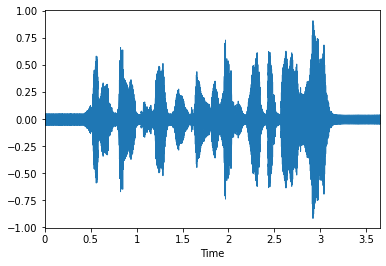

In [ ]:
#for angry file
file=  '/content/drive/MyDrive/Colab Notebooks/SOUNDATASET/Soundataset/ALL/DC_a01.wav'
data, s_r=lib.load(file)
print(data)

libp.waveplot(data, s_r)
ipy.display.Audio(file)
#lib.beat.tempogram(data, s_r)

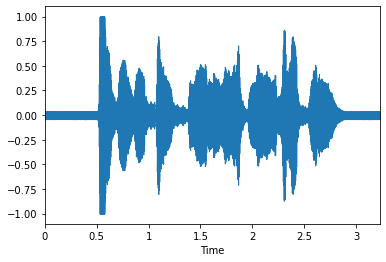

In [ ]:
#for happy track
h_file= '/content/drive/MyDrive/Colab Notebooks/SOUNDATASET/Soundataset/ALL/DC_h04.wav'
data1, s_r1=lib.load(h_file)
libp.waveplot(data1,s_r1)
ipy.display.Audio(h_file)

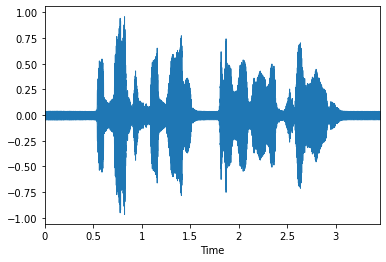

In [ ]:
#for sad track
s_file= '/content/drive/MyDrive/Colab Notebooks/SOUNDATASET/Soundataset/ALL/DC_su07.wav'
data2, s_r2=lib.load(s_file)

libp.waveplot(data2, s_r2)
ipy.display.Audio(s_file)

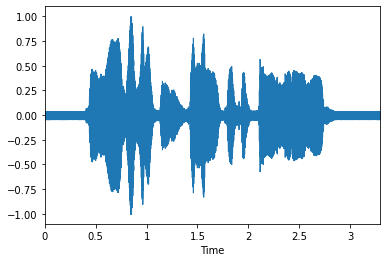

In [ ]:
#for fear track
f_file= '/content/drive/MyDrive/Colab Notebooks/SOUNDATASET/Soundataset/ALL/DC_f05.wav'
data3, s_r3=lib.load(f_file)

libp.waveplot(data3, s_r3)
ipy.display.Audio(f_file)

FEATURE EXTRACTION

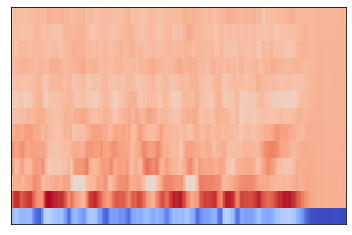

In [ ]:
#FOR ANGRY
data, s_r = lib.load(file, res_type='kaiser_fast',duration=3,sr=22050*2,offset=0.5)  
mfcc = lib.feature.mfcc(data, s_r, n_mfcc=13)
libp.specshow(mfcc)

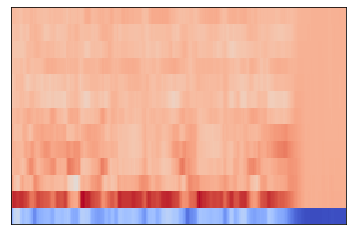

In [ ]:
#FOR HAPPY
data1, s_r1=lib.load(h_file, res_type='kaiser-fast', duration=3, sr=22050*2, offset=0.5)
mfcc1=lib.feature.mfcc(data1, s_r1, n_mfcc=13)
libp.specshow(mfcc1)

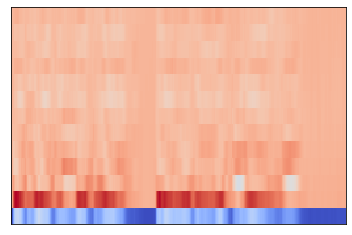

In [ ]:
#FOR SAD
data2, s_r2=lib.load(s_file, res_type='kaiser-fast', duration=3, sr=22050*2, offset=0.5)
mfcc2=lib.feature.mfcc(data2, s_r2, n_mfcc=13)
libp.specshow(mfcc2)

In [ ]:
df1=pd.DataFrame(columns=['Feature'])
counter=0
for path in df['Path']:
  #print(path)
  p1=path
  d9, s_r9=lib.load(p1, res_type='kaiser_fast'
                                  ,duration=2.5
                                  ,sr=44100
                                  ,offset=0.5)
  s_r9=np.array(s_r9)
  mf=np.mean(lib.feature.mfcc(d9, s_r9, n_mfcc=13), axis=0)
 
  df1.loc[counter] = [mf]
  counter=counter+1 

print(df1)



                                               Feature
0    [-11.113932579488578, -7.215754117994693, -6.2...
1    [-23.959704951096896, -23.641238746601168, -23...
2    [-4.868549342639136, -5.745611514989708, -7.77...
3    [-27.551818220344348, -25.248303692971938, -22...
4    [-24.47234122830723, -23.146885269389767, -23....
..                                                 ...
395  [-16.661368042322163, -18.899100721305782, -24...
396  [-18.857577948846874, -20.878915680952137, -24...
397  [-14.793880396742662, -17.510644052243407, -28...
398  [-41.98071652908061, -42.37794381222588, -39.8...
399  [-30.20561312277607, -28.294017580698366, -27....

[400 rows x 1 columns]


In [ ]:
df=df.drop(['labels','audio','Path'], axis=1)
print(df)

     label_num
0            0
1            0
2            0
3            0
4            0
..         ...
395          0
396          0
397          0
398          1
399          2

[400 rows x 1 columns]


In [ ]:
df = pd.concat([df, pd.DataFrame(df1['Feature'].values.tolist())],axis=1)
print(df)


     label_num          0          1  ...        213        214        215
0            0 -11.113933  -7.215754  ...  -6.611348  -2.509087   1.964607
1            0 -23.959705 -23.641239  ...  -6.033025  -9.823800  -9.753228
2            0  -4.868549  -5.745612  ...  -5.467062  -5.280918  -3.996172
3            0 -27.551818 -25.248304  ... -27.242735 -26.979710 -27.205200
4            0 -24.472341 -23.146885  ... -21.246147 -21.963620 -22.457009
..         ...        ...        ...  ...        ...        ...        ...
395          0 -16.661368 -18.899101  ...        NaN        NaN        NaN
396          0 -18.857578 -20.878916  ... -26.840805 -25.147421 -23.436581
397          0 -14.793880 -17.510644  ...        NaN        NaN        NaN
398          1 -41.980717 -42.377944  ... -29.114492 -27.535094 -24.695727
399          2 -30.205613 -28.294018  ...        NaN        NaN        NaN

[400 rows x 217 columns]


In [ ]:
df=df.fillna(method='ffill')
print(df)

     label_num          0          1  ...        213        214        215
0            0 -11.113933  -7.215754  ...  -6.611348  -2.509087   1.964607
1            0 -23.959705 -23.641239  ...  -6.033025  -9.823800  -9.753228
2            0  -4.868549  -5.745612  ...  -5.467062  -5.280918  -3.996172
3            0 -27.551818 -25.248304  ... -27.242735 -26.979710 -27.205200
4            0 -24.472341 -23.146885  ... -21.246147 -21.963620 -22.457009
..         ...        ...        ...  ...        ...        ...        ...
395          0 -16.661368 -18.899101  ... -26.741160 -24.144054 -21.752971
396          0 -18.857578 -20.878916  ... -26.840805 -25.147421 -23.436581
397          0 -14.793880 -17.510644  ... -26.840805 -25.147421 -23.436581
398          1 -41.980717 -42.377944  ... -29.114492 -27.535094 -24.695727
399          2 -30.205613 -28.294018  ... -29.114492 -27.535094 -24.695727

[400 rows x 217 columns]


In [ ]:
print(df.columns)

Index(['label_num',           0,           1,           2,           3,
                 4,           5,           6,           7,           8,
       ...
               206,         207,         208,         209,         210,
               211,         212,         213,         214,         215],
      dtype='object', length=217)


In [ ]:
y=df['label_num']
print(y.dtypes)

int8


In [ ]:
df['label_num']=df['label_num'].astype('category')
print(df['label_num'].dtype)

category


In [ ]:
df2=df.drop(['label_num'], axis=1)
print(df2)

           0          1          2    ...        213        214        215
0   -11.113933  -7.215754  -6.219192  ...  -6.611348  -2.509087   1.964607
1   -23.959705 -23.641239 -23.807820  ...  -6.033025  -9.823800  -9.753228
2    -4.868549  -5.745612  -7.774526  ...  -5.467062  -5.280918  -3.996172
3   -27.551818 -25.248304 -22.912869  ... -27.242735 -26.979710 -27.205200
4   -24.472341 -23.146885 -23.291375  ... -21.246147 -21.963620 -22.457009
..         ...        ...        ...  ...        ...        ...        ...
395 -16.661368 -18.899101 -24.841058  ... -26.741160 -24.144054 -21.752971
396 -18.857578 -20.878916 -24.582844  ... -26.840805 -25.147421 -23.436581
397 -14.793880 -17.510644 -28.352653  ... -26.840805 -25.147421 -23.436581
398 -41.980717 -42.377944 -39.890235  ... -29.114492 -27.535094 -24.695727
399 -30.205613 -28.294018 -27.909386  ... -29.114492 -27.535094 -24.695727

[400 rows x 216 columns]


In [ ]:
X=df2

In [ ]:
import sklearn.preprocessing as pps
d_scale=pps.MinMaxScaler(feature_range=(0,1))
scale_d=d_scale.fit_transform(df2)
print(scale_d)


[[0.59685699 0.72166922 0.81720511 ... 0.84265879 0.90000847 0.88820729]
 [0.36448181 0.38455237 0.40502797 ... 0.85554464 0.74367408 0.67072596]
 [0.70983362 0.75184244 0.78075696 ... 0.86815508 0.84076726 0.77757609]
 ...
 [0.53028812 0.51037677 0.29852299 ... 0.39191831 0.41616848 0.41676491]
 [0.0384885  0.         0.02814785 ... 0.34125739 0.36513772 0.39339532]
 [0.25149568 0.28905868 0.30891064 ... 0.34125739 0.36513772 0.39339532]]


In [ ]:
d_standard=pps.StandardScaler().fit_transform(scale_d)
print(d_standard.round(2))

[[ 0.83  1.27  1.6  ...  1.12  1.28  1.39]
 [-0.42 -0.46 -0.48 ...  1.18  0.59  0.42]
 [ 1.44  1.42  1.41 ...  1.24  1.02  0.89]
 ...
 [ 0.47  0.19 -1.02 ... -0.98 -0.86 -0.71]
 [-2.18 -2.42 -2.39 ... -1.21 -1.08 -0.82]
 [-1.03 -0.94 -0.97 ... -1.21 -1.08 -0.82]]


In [ ]:
from sklearn.model_selection import train_test_split as tts 
X_train, X_test,y_train, y_test=tts(d_standard, df['label_num'], train_size=0.85, random_state=1)
print(X_train)
print(y_train)


[[-0.63923632 -0.42532363 -0.3890296  ... -0.93164616 -0.92385393
  -0.91726598]
 [-0.35273458 -0.46743794  0.75112603 ...  0.97739371  0.73650931
   0.8395073 ]
 [ 0.52491544  0.99559175  1.46869586 ...  1.31344672  1.30790593
   1.12294663]
 ...
 [ 0.07691653 -0.16653464 -0.57649674 ... -0.9754949  -0.85724311
  -0.7115161 ]
 [-0.42439316 -0.48383407 -0.59985383 ... -0.78396788 -1.10789344
  -0.95427995]
 [-0.81158757 -0.70749329 -0.66245254 ...  0.17456041 -0.06237985
  -0.03324882]]
107    5
67     4
234    0
246    1
354    6
      ..
255    0
72     5
396    0
235    5
37     4
Name: label_num, Length: 340, dtype: category
Categories (7, int64): [0, 1, 2, 3, 4, 5, 6]


In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp=MLPClassifier( activation='relu', alpha= 0.0001, hidden_layer_sizes= (50, 50, 50), learning_rate='adaptive', solver= 'sgd',  max_iter=1900)

In [ ]:
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 50, 50), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=1900,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
y_pred=mlp.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.38333333333333336


In [ ]:
 
from sklearn.metrics import classification_report
 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.46      0.48        13
           1       0.33      0.10      0.15        10
           2       0.33      0.60      0.43         5
           3       0.29      0.29      0.29         7
           4       0.47      0.57      0.52        14
           5       0.50      0.33      0.40         9
           6       0.00      0.00      0.00         2

    accuracy                           0.38        60
   macro avg       0.35      0.34      0.32        60
weighted avg       0.41      0.38      0.38        60

